This notebook gets lyrics using the GeniusLyrics package and does some initial exploration. We're starting with Slayer. 

## Import some stuff

In [32]:
import lyricsgenius as genius
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
#from textblob import TextBlob

## Get all the lyrics 

...and write them to a .json file

In [33]:
api_key = 'YOUR_API_KEY_HERE'
api = genius.Genius(api_key)
api.remove_section_headers = True # Removes section headers like "Verse" and "Intro"
genius.skip_non_songs = True # Exclude hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title
artist = api.search_artist('metallica')
lyrics = artist.save_lyrics()

Searching for songs by metallica...

Changing artist name to 'Metallica'
Song 1: "Nothing Else Matters"
Song 2: "One"
Song 3: "Enter Sandman"
Song 4: "Master of Puppets"
Song 5: "The Unforgiven"
Song 6: "Fade to Black"
Song 7: "For Whom the Bell Tolls"
Song 8: "Sad But True"
Song 9: "Welcome Home (Sanitarium)"
Song 10: "Creeping Death"
Song 11: "Wherever I May Roam"
Song 12: "...And Justice for All"
Song 13: "Atlas, Rise!"
Song 14: "Battery"
Song 15: "Blackened"
Song 16: "The Unforgiven II"
Song 17: "Seek & Destroy"
Song 18: "Hardwired"
Song 19: "The Four Horsemen"
Song 20: "Turn the Page"
Song 21: "Ride the Lightning"
Song 22: "The Day That Never Comes"
Song 23: "The Unforgiven III"
Song 24: "Fuel"
Song 25: "Disposable Heroes"
Song 26: "To Live Is to Die"
Song 27: "Harvester of Sorrow"
Song 28: "Dyers Eve"
Song 29: "Whiskey in the Jar"
Song 30: "Now That We’re Dead"
Song 31: "Moth Into Flame"
Song 32: "The Thing That Should Not Be"
Song 33: "St. Anger"
Song 34: "Orion"
Song 35: "Don’t

Song 246: "Seek & Destroy (Live) [Whiplash Single]"
Song 247: "Look at Myself"
Song 248: "The Four Horsemen [Live Shit: Binge and Purge]"
Song 249: "Overkill [Live- Until it Sleeps Japanese EP]"
Song 250: "Fuel (Live at ’The Late Late Show with Craig Ferguson)"
Song 251: "Temptation"
Song 252: "Motorbreath [Live Shit: Binge and Purge]"
Song 253: "Echo Chamber"
Song 254: "Some Kind of Monster (Edit)"
Song 255: "For Whom the Bell Tolls (Live with the San Francisco Symphony)"
Song 256: "Last Caress/Am I Evil?/Battery (Live)"
Song 257: "Unbridled"
Song 258: "More Than This"
Song 259: "Surfing the Zeitguest"
Song 260: "Overkill (live rehearsal)"
Done. Found 260 songs.
Lyrics_Metallica.json already exists. Overwrite?
(y/n): y
Wrote `Lyrics_Metallica.json`


210 songs! 

Interesting - it seems we have some duplicates here (live and non-live versions mostly, possibly remixes). That might be useful if the lyrics are similar for the live versions with slight variations (more data), but if they are exactly the same I should probably remove them. 

## Create Lyrics DataFrame

In [34]:
with open("Lyrics_Metallica.json") as f:
    data = json.load(f)

df = pd.DataFrame(data["songs"])[["title", "lyrics"]]
df.dropna(inplace=True)

df.head()

,title,lyrics
0,Nothing Else Matters,So close no matter how far\nCouldn't be much m...
1,One,I can't remember anything\nCan't tell if this ...
2,Enter Sandman,"Say your prayers, little one, don't forget, my..."
3,Master of Puppets,"End of passion play, crumbling away\nI'm your ..."
4,The Unforgiven,New blood joins this Earth and quickly he's su...


In [35]:
#Take a look at a song
df.at[4,'lyrics']

'New blood joins this Earth and quickly he\'s subdued\nThrough constant pained disgrace, the young boy learns their rules\nWith time the child draws in this whipping boy done wrong\nDeprived of all his thoughts, the young man struggles on and on\nHe\'s known, ooh, a vow unto his own that never from this day\nHis will they\'ll take away, yeah\n\nWhat I\'ve felt, what I\'ve known\nNever shined through in what I\'ve shown\nNever be, never see\nWon\'t see what might have been\nWhat I\'ve felt, what I\'ve known\nNever shined through in what I\'ve shown\nNever free, never me\nSo I dub thee "Unforgiven"\n\nThey dedicate their lives to running all of his\nHe tries to please them all this bitter man he is\nThroughout his life the same, he\'s battled constantly\nThis fight he cannot win, a tired man they see no longer cares\nThe old man then prepares to die regretfully\nThat old man here is me, yeah\n\nWhat I\'ve felt, what I\'ve known\nNever shined through in what I\'ve shown\nNever be, never s

In [22]:
#For Slayer only
#This song (111) is actually a story about the guitarist's death, so it needs to be taken out of the corpus. 
#df = df.drop([111])

In [36]:
df["lyrics"] = (
    df["lyrics"]
    .apply(lambda x: x.lower())
     .apply(lambda x: x.replace("\\", " "))
     .apply(lambda x: x.replace("\\n", " "))
#     .apply(lambda x: x.replace("\n", " "))
     .apply(lambda x: x.replace("'", ""))
     .apply(lambda x: x.replace("\n\n", "\n"))
     .apply(lambda x: x.replace("\n \n", "\n"))
     .apply(lambda x: x.replace("\n\n\n", "\n"))
#     .apply(lambda x: x.replace("[verse 1]", " "))
#     .apply(lambda x: x.replace("[verse 2]", " "))
#     .apply(lambda x: x.replace("[verse 3]", " "))
#     .apply(lambda x: x.replace("[verse 4]", " "))
#     .apply(lambda x: x.replace("[verse 5]", " "))
#     .apply(lambda x: x.replace("[chorus]", " "))
#     .apply(lambda x: x.replace("[bridge]", " "))
#     .apply(lambda x: x.replace("[outro]", " "))
#     .apply(lambda x: x.replace("[intro]", " "))
#     .apply(lambda x: x.replace("[pre]", " "))
#     .apply(lambda x: x.replace("[produced by rick rubin]", " "))
#     .apply(lambda x: x.replace("[lead - hanneman]", " "))
#     .apply(lambda x: x.replace("[produced by rick rubin and slayer]", " "))
#     .apply(lambda x: x.replace("[instrumental intro]", " "))
    
)
df.head()

,title,lyrics
0,Nothing Else Matters,so close no matter how far\ncouldnt be much mo...
1,One,i cant remember anything\ncant tell if this is...
2,Enter Sandman,"say your prayers, little one, dont forget, my ..."
3,Master of Puppets,"end of passion play, crumbling away\nim your s..."
4,The Unforgiven,new blood joins this earth and quickly hes sub...


In [37]:
text = " ".join(df.lyrics)
len(text)

385960

In [38]:
text_file = open("metallica_corpus.txt", "w")
text_file.write(text)
text_file.close()



## Explore Data

In [55]:
# Define default stopwords list
stoplist = ENGLISH_STOP_WORDS

In [51]:
df_explore = df;

df_explore["lyrics"] = (
    df_explore["lyrics"]
    .apply(lambda x: x.lower())
    .apply(lambda x: x.replace("\\", " "))
    .apply(lambda x: x.replace("\\n", " "))
    .apply(lambda x: x.replace("\n", " "))
    .apply(lambda x: x.replace("'", ""))
    .apply(lambda x: x.replace("\n\n", "\n"))
    .apply(lambda x: x.replace("\n \n", "\n"))
    .apply(lambda x: x.replace("\n\n\n", "\n"))
)
df_explore.head()

,title,lyrics
0,Angel of Death,[produced by rick rubin and slayer] [ ] aaaaa...
1,Raining Blood,[produced by rick rubin] [instrumental ] [ ]...
2,Dead Skin Mask,[ ] how ive waited for you to come ive been he...
3,South of Heaven,[ ] an unforeseen future nestled somewhere in ...
4,Evil Has No Boundaries,[ ] aaaaaaahhhhh [lead - hanneman] [ 1] bla...


In [52]:
def show_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stoplist, background_color="white", colormap="Blues").generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f'Word Cloud for Bjork', fontsize=20)
    plt.axis("off")
    plt.show()

In [53]:
def get_wordcloud(df):
    # Get all texts and generate a cloud
    text = " ".join(review for review in df.lyrics)
    show_wordcloud(text) 

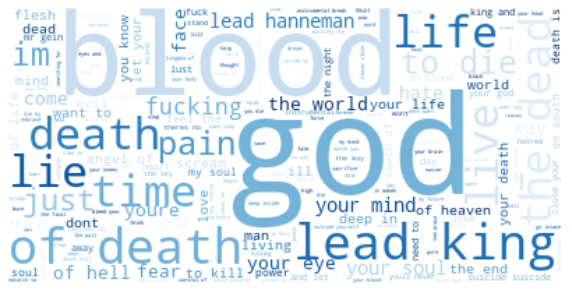

In [56]:
get_wordcloud(df)